In [9]:
class node:
	def __init__(self,value=None):
		self.value=value
		self.left_child=None
		self.right_child=None
		self.parent=None # pointer to parent node in tree

class binary_search_tree:
	def __init__(self):
		self.root=None

	def insert(self,value):
		if self.root==None:
			self.root=node(value)
		else:
			self._insert(value,self.root)

	def _insert(self,value,cur_node):
		if value<cur_node.value:
			if cur_node.left_child==None:
				cur_node.left_child=node(value)
				cur_node.left_child.parent=cur_node # set parent
			else:
				self._insert(value,cur_node.left_child)
		elif value>cur_node.value:
			if cur_node.right_child==None:
				cur_node.right_child=node(value)
				cur_node.right_child.parent=cur_node # set parent
			else:
				self._insert(value,cur_node.right_child)
		else:
			print("Value already in tree!")

	def print_tree(self):
		if self.root!=None:
			self._print_tree(self.root)

	def _print_tree(self,cur_node):
		if cur_node!=None:
			self._print_tree(cur_node.left_child)
			print (str(cur_node.value))
			self._print_tree(cur_node.right_child)

	def height(self):
		if self.root!=None:
			return self._height(self.root,0)
		else:
			return 0

	def _height(self,cur_node,cur_height):
		if cur_node==None: return cur_height
		left_height=self._height(cur_node.left_child,cur_height+1)
		right_height=self._height(cur_node.right_child,cur_height+1)
		return max(left_height,right_height)

	def find(self,value):
		if self.root!=None:
			return self._find(value,self.root)
		else:
			return None

	def _find(self,value,cur_node):
		if value==cur_node.value:
			return cur_node
		elif value<cur_node.value and cur_node.left_child!=None:
			return self._find(value,cur_node.left_child)
		elif value>cur_node.value and cur_node.right_child!=None:
			return self._find(value,cur_node.right_child)

	def delete_value(self,value):
		return self.delete_node(self.find(value))

	def delete_node(self,node):

		## -----
		# Improvements since prior lesson

		# Protect against deleting a node not found in the tree
		if node==None or self.find(node.value)==None:
			print ("Node to be deleted not found in the tree!")
			return None 
		## -----

		# returns the node with min value in tree rooted at input node
		def min_value_node(n):
			current=n
			while current.left_child!=None:
				current=current.left_child
			return current

		# returns the number of children for the specified node
		def num_children(n):
			num_children=0
			if n.left_child!=None: num_children+=1
			if n.right_child!=None: num_children+=1
			return num_children

		# get the parent of the node to be deleted
		node_parent=node.parent

		# get the number of children of the node to be deleted
		node_children=num_children(node)

		# break operation into different cases based on the
		# structure of the tree & node to be deleted

		# CASE 1 (node has no children)
		if node_children==0:

			# Added this if statement post-video, previously if you 
			# deleted the root node it would delete entire tree.
			if node_parent!=None:
				# remove reference to the node from the parent
				if node_parent.left_child==node:
					node_parent.left_child=None
				else:
					node_parent.right_child=None
			else:
				self.root=None

		# CASE 2 (node has a single child)
		if node_children==1:

			# get the single child node
			if node.left_child!=None:
				child=node.left_child
			else:
				child=node.right_child

			# Added this if statement post-video, previously if you 
			# deleted the root node it would delete entire tree.
			if node_parent!=None:
				# replace the node to be deleted with its child
				if node_parent.left_child==node:
					node_parent.left_child=child
				else:
					node_parent.right_child=child
			else:
				self.root=child

			# correct the parent pointer in node
			child.parent=node_parent

		# CASE 3 (node has two children)
		if node_children==2:

			# get the inorder successor of the deleted node
			successor=min_value_node(node.right_child)

			# copy the inorder successor's value to the node formerly
			# holding the value we wished to delete
			node.value=successor.value

			# delete the inorder successor now that it's value was
			# copied into the other node
			self.delete_node(successor)

	def search(self,value):
		if self.root!=None:
			return self._search(value,self.root)
		else:
			return False

	def _search(self,value,cur_node):
		if value==cur_node.value:
			return True
		elif value<cur_node.value and cur_node.left_child!=None:
			return self._search(value,cur_node.left_child)
		elif value>cur_node.value and cur_node.right_child!=None:
			return self._search(value,cur_node.right_child)
		return False 

In [10]:
import matplotlib.pyplot as plt

def plot_tree(tree):
    if not tree.root:
        print("Tree is empty.")
        return

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_aspect('equal')
    ax.axis('off')

    def plot_node(node, x, y, x_offset, y_offset=1.5):
        if node is not None:
            ax.text(x, y, str(node.value), ha='center', va='center', 
                    bbox=dict(boxstyle="circle", facecolor="lightblue", edgecolor="black"))

            if node.left_child:
                # Draw a line to the left child
                ax.plot([x, x - x_offset], [y, y - y_offset], 'k-')
                plot_node(node.left_child, x - x_offset, y - y_offset, x_offset / 2)

            if node.right_child:
                # Draw a line to the right child
                ax.plot([x, x + x_offset], [y, y - y_offset], 'k-')
                plot_node(node.right_child, x + x_offset, y - y_offset, x_offset / 2)

    plot_node(tree.root, x=0, y=0, x_offset=8)
    plt.show()


Inserting elements into the Binary Search Tree...
Inserted 15
Inserted 10
Inserted 20
Inserted 8
Inserted 12
Inserted 17
Inserted 25
Inserted 19

Binary Search Tree (In-Order Traversal):

Binary Search Tree (Visual Representation):


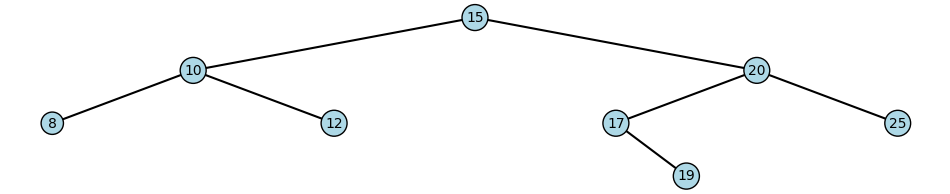


Height of the tree: 4

Searching for elements in the BST:
Search for 10: Found
Search for 19: Found
Search for 5: Not Found

Deleting elements from the BST:
Deleting 20...
Tree after deletion:

Binary Search Tree (Visual Representation):


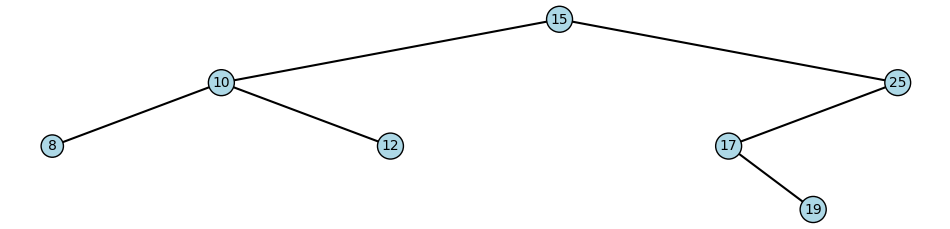

Deleting 10...
Tree after deletion:

Binary Search Tree (Visual Representation):


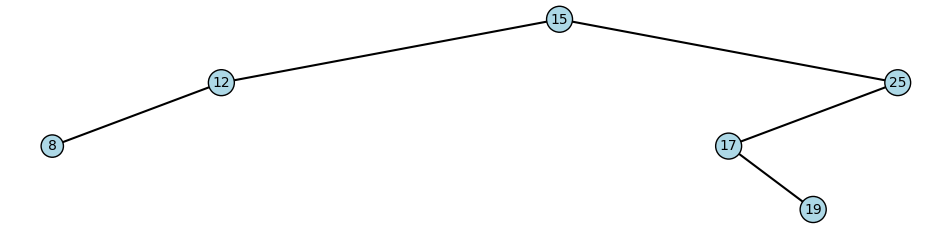

Deleting 15...
Tree after deletion:

Binary Search Tree (Visual Representation):


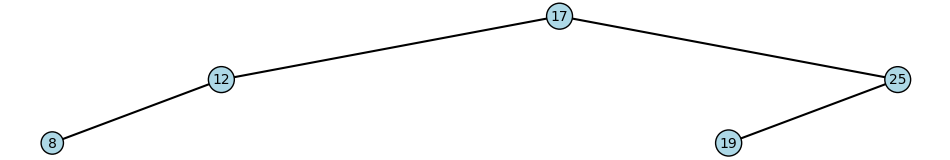


Final height of the tree: 3


In [11]:
# Create a binary search tree instance
bst = binary_search_tree()

# Insert elements into the BST
print("Inserting elements into the Binary Search Tree...")
for value in [15, 10, 20, 8, 12, 17, 25, 19]:
    bst.insert(value)
    print(f"Inserted {value}")

# Print the tree
print("\nBinary Search Tree (In-Order Traversal):")
# bst.print_tree()
print("\nBinary Search Tree (Visual Representation):")
plot_tree(bst)

# Check the height of the tree
print("\nHeight of the tree:", bst.height())

# Search for specific values
search_values = [10, 19, 5]
print("\nSearching for elements in the BST:")
for val in search_values:
    result = bst.search(val)
    print(f"Search for {val}: {'Found' if result else 'Not Found'}")

# Delete elements from the tree
delete_values = [20, 10, 15]
print("\nDeleting elements from the BST:")
for val in delete_values:
    print(f"Deleting {val}...")
    bst.delete_value(val)
    print("Tree after deletion:")
    # bst.print_tree()
    print("\nBinary Search Tree (Visual Representation):")
    plot_tree(bst)

# Final height of the tree after deletions
print("\nFinal height of the tree:", bst.height())
